In [122]:
import spacy
from docx import Document
from string import punctuation
from spacy.lang.en.stop_words import STOP_WORDS
import matplotlib.pyplot as plt
import numpy as np

In [76]:
nlp = spacy.load("en_core_web_md")
STOP_WORDS = list(STOP_WORDS)

In [30]:
bachelor_thesis = Document('./../Linss-Lukas-ba.docx')
paragraphs = bachelor_thesis.paragraphs
text_paragraphs = []
for p in paragraphs:
    if len(p.text) > 100:
        text_paragraphs.append(p.text)

In [125]:
def get_similarity(sentence, paragraph):
    sentence = nlp(sentence.text)
    similarity_list = []

    for s in nlp(paragraph).sents:
        similarity_list.append((s.text, sentence.similarity(nlp(s.text))))
    
    return similarity_list

In [126]:
### remove stop words from text
doc = nlp(bachelor_thesis.paragraphs[3].text) # paragraph 3 is the abstract
text = ''
for sent in doc.sents:
    for token in sent:
        if token.text not in STOP_WORDS:
            text += token.text + ' '

In [127]:
doc = nlp(text)
sentences = list(doc.sents)

In [128]:
similarity_matrix = [get_similarity(s, doc) for s in sentences]


In [129]:
for x, row in enumerate(similarity_matrix):
    for y, tup in enumerate(row):
        print(round(tup[1], 1), end=' ')
        print(' ', end=' ')
    print(' ')
    print(' ')

1.0   0.9   0.8   0.8   0.9   0.9   0.9   0.8   0.8   0.9   0.8   0.8    
 
0.9   1.0   0.8   0.8   0.9   0.9   0.9   0.8   0.8   0.8   0.8   0.8    
 
0.8   0.8   1.0   0.8   0.8   0.9   0.8   0.9   0.8   0.8   0.8   0.8    
 
0.8   0.8   0.8   1.0   0.9   0.9   0.8   0.9   0.9   0.8   0.7   0.8    
 
0.9   0.9   0.8   0.9   1.0   0.9   0.9   0.9   0.9   0.9   0.8   0.8    
 
0.9   0.9   0.9   0.9   0.9   1.0   0.9   0.8   0.9   0.8   0.8   0.8    
 
0.9   0.9   0.8   0.8   0.9   0.9   1.0   0.8   0.8   0.9   0.9   0.8    
 
0.8   0.8   0.9   0.9   0.9   0.8   0.8   1.0   0.9   0.8   0.8   0.8    
 
0.8   0.8   0.8   0.9   0.9   0.9   0.8   0.9   1.0   0.9   0.8   0.8    
 
0.9   0.8   0.8   0.8   0.9   0.8   0.9   0.8   0.9   1.0   0.8   0.8    
 
0.8   0.8   0.8   0.7   0.8   0.8   0.9   0.8   0.8   0.8   1.0   0.8    
 
0.8   0.8   0.8   0.8   0.8   0.8   0.8   0.8   0.8   0.8   0.8   1.0    
 


In [130]:
matrix = [[0] * len(similarity_matrix) for i in range(len(similarity_matrix))]

for x,row in enumerate(similarity_matrix):
    for y, tup in enumerate(row):
            #print(tup[1])
            matrix[x][y] = tup[1]

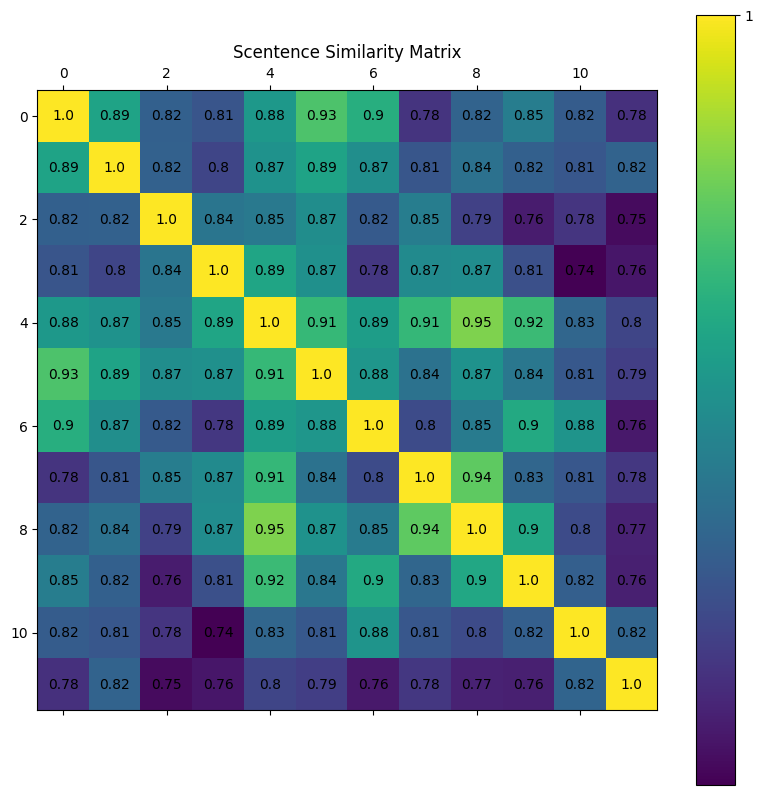

In [131]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Scentence Similarity Matrix')

cax = ax.matshow(matrix, interpolation='nearest')
fig.colorbar(cax,ticks=range(len(matrix)))

for (x, y), z in np.ndenumerate(matrix):
    ax.text(x, y, str(round(z, 2)), ha='center', va='center')

plt.savefig('sm_abstract.png')